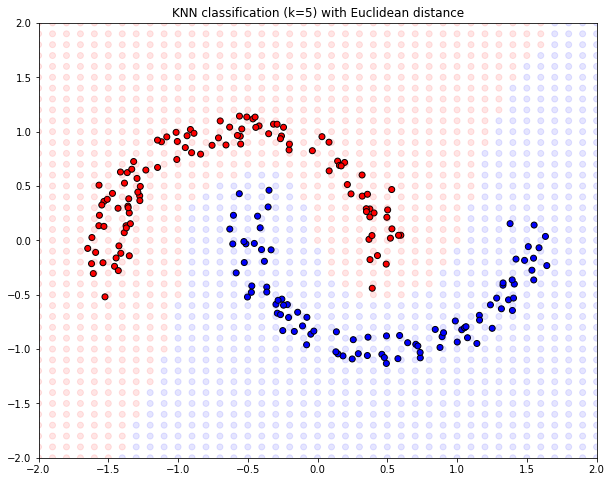

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

data = np.loadtxt('data/D2z.txt')

# training data
X_train = np.array([x[0:2] for x in data])
y_train = np.array([x[2] for x in data])

# Create KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Generate test data grid
xx, yy = np.meshgrid(np.arange(-2, 2.1, 0.1), np.arange(-2, 2.1, 0.1))
X_test = np.c_[xx.ravel(), yy.ravel()]

# Perform KNN prediction on test data
y_pred = knn.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr', edgecolors='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='bwr', alpha=0.1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title("KNN classification (k=5) with Euclidean distance")
plt.show()

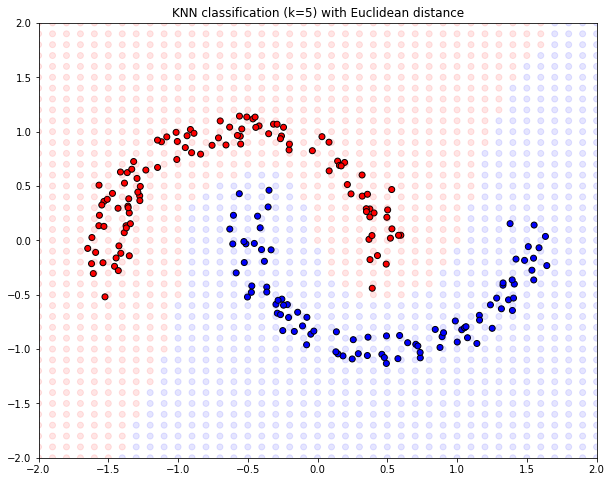

In [2]:
# implement KNN from scratch

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data/D2z.txt')

# training data
X_train = np.array([x[0:2] for x in data])
y_train = np.array([x[2] for x in data])

# Define function to calculate euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Define function to perform KNN prediction
def knn_predict(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x, x_test) for x in X_train]
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_nearest_indices]
    uniqw, inverse = np.unique(k_nearest_labels, return_inverse=True)  
    return uniqw[np.bincount(inverse).argmax()]

# Generate test data grid
xx, yy = np.meshgrid(np.arange(-2, 2.1, 0.1), np.arange(-2, 2.1, 0.1))
X_test = np.c_[xx.ravel(), yy.ravel()]

# Perform KNN prediction on test data
y_pred = [knn_predict(X_train, y_train, x, k=5) for x in X_test]

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr', edgecolors='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='bwr', alpha=0.1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title("KNN classification (k=5) with Euclidean distance")
plt.show()

In [6]:
# since this file is big, we provide an glance here
data = pd.read_csv('data/emails.csv')
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Email 4996,20,6,3,1,1,1,34,0,0,...,0,0,0,0,0,0,0,1,0,0
4996,Email 4997,0,7,1,0,0,0,20,1,1,...,0,0,0,1,0,0,0,0,0,0
4997,Email 4998,6,8,1,3,2,1,64,7,1,...,0,0,0,0,0,0,0,0,0,0
4998,Email 4999,8,6,2,5,6,1,51,4,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the dataset
data = pd.read_csv('data/emails.csv')

# Prepare features and labels
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize the KFold cross validator
kf = KFold(n_splits=5, shuffle=False, random_state= None)

# Initialize lists to store the evaluation metrics
accuracies = []
precisions = []
recalls = []

# the splits of datasets:
# – Fold 1, test set: Email 1-1000, training set: the rest (Email 1001-5000)
# – Fold 2, test set: Email 1000-2000, training set: the rest
# – Fold 3, test set: Email 2000-3000, training set: the rest
# – Fold 4, test set: Email 3000-4000, training set: the rest
# – Fold 5, test set: Email 4000-5000, training set: the rest

# Perform 5-fold cross validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    # Split the data into training and validation sets for this fold
    X_fold_train, y_fold_train = X.iloc[train_idx], y.iloc[train_idx]
    X_fold_val, y_fold_val = X.iloc[test_idx], y.iloc[test_idx]

    # Train the KNN classifier on the training set for this fold
    knn.fit(X_fold_train, y_fold_train)

    # Evaluate the KNN classifier on the validation set for this fold
    y_pred_val = knn.predict(X_fold_val)

    # Calculate the evaluation metrics for this fold
    accuracy = accuracy_score(y_fold_val, y_pred_val)
    precision = precision_score(y_fold_val, y_pred_val)
    recall = recall_score(y_fold_val, y_pred_val)

    # Print the evaluation metrics for this fold
    print(f"Fold {fold+1}: accuracy={accuracy}, precision={precision}, recall={recall}")

    # Add the evaluation metrics for this fold to the respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

# Calculate the average evaluation metrics over all folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)

# Print the average evaluation metrics over all folds
print(f"Average: accuracy={avg_accuracy}, precision={avg_precision}, recall={avg_recall}")

Fold 1: accuracy=0.837, precision=0.6685082872928176, recall=0.8491228070175438
Fold 2: accuracy=0.85, precision=0.7068403908794788, recall=0.7833935018050542
Fold 3: accuracy=0.869, precision=0.7475728155339806, recall=0.8133802816901409
Fold 4: accuracy=0.869, precision=0.7620578778135049, recall=0.8061224489795918
Fold 5: accuracy=0.779, precision=0.613941018766756, recall=0.7483660130718954
Average: accuracy=0.8408, precision=0.6997840780573077, recall=0.8000770105128453


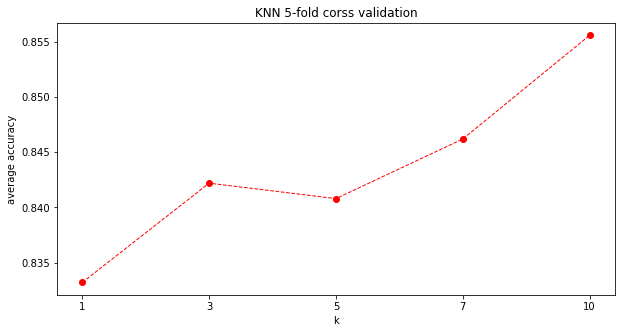

In [4]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the dataset
data = pd.read_csv('data/emails.csv')

# Prepare features and labels
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Initialize the KFold cross validator
kf = KFold(n_splits= 5, shuffle=False, random_state= None)

k_list = [1, 3, 5, 7, 10]
acc_list = []

for k in k_list:

    knn = KNeighborsClassifier(n_neighbors= k)

    # Initialize lists to store the accuracy for each k
    accuracies = []

    # Perform 5-fold cross validation
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        # Split the data into training and validation sets for this fold
        X_fold_train, y_fold_train = X.iloc[train_idx], y.iloc[train_idx]
        X_fold_val, y_fold_val = X.iloc[test_idx], y.iloc[test_idx]

        # Train the KNN classifier on the training set for this fold
        knn.fit(X_fold_train, y_fold_train)

        # Evaluate the KNN classifier on the validation set for this fold
        y_pred_val = knn.predict(X_fold_val)

        # Calculate the accuracy for this fold
        accuracy = accuracy_score(y_fold_val, y_pred_val)
        accuracies.append(accuracy)

    # Calculate the average accuracy over all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    acc_list.append(avg_accuracy)

# plot the average accuracy KNN with respect to different k
temp = [0,1,2,3,4]
plt.figure(figsize = (10,5))
plt.title('KNN 5-fold corss validation') 
plt.xlabel('k') 
plt.ylabel('average accuracy') 
plt.xticks(temp,labels=['1','3','5','7','10'])
plt.plot(temp,acc_list,'ro--', alpha=1, linewidth=1)
plt.show()

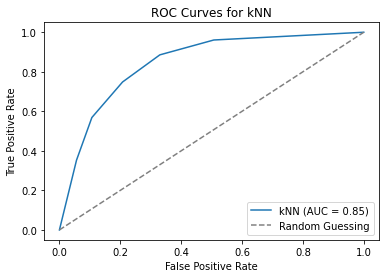

In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/emails.csv')
X_train = data.iloc[:4000, 1:-1]
y_train = data.iloc[:4000, -1]
X_test = data.iloc[4000:, 1:-1]
y_test = data.iloc[4000:, -1]

# Train kNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Calculate predicted probabilities for kNN
y_hat_knn = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold for kNN
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, y_hat_knn)

# Calculate the AUC (area under the curve) for kNN
knn_auc = roc_auc_score(y_test, y_hat_knn)

# Plot the ROC curves
plt.plot(knn_fpr, knn_tpr, label='kNN (AUC = {:.2f})'.format(knn_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for kNN')
plt.legend()
plt.show()